# Identifying Right AD Banner Using MAB



Let us say you are running a website and you have five different banners for the same ad and you want to know which banner attracts the user? We model this problem statement as a bandit problem. Let us say these five banners are five bandits and we assign reward 1 if the user clicks the ad and reward 0 if the user does not click the ad.

In a normal A/B testing, we perform complete exploration of all these five banners alone before deciding which banner is the best. But that will cost us lot of regret. Instead, we will use good exploration strategy for deciding which banner will give us most rewards (most clicks)

The exploration strategy we will use for this will be Epsilon-Greedy policy.

let's understand the problem:

* You have 5 different ad banners
* Each time a user sees a banner, they either click it (reward = 1) or don't (reward = 0)
* Your goal is to find which banner gets the most clicks while also testing all banners enough to be confident in your choice

 First, let us import necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Let us simulate a dataset with 5*10000 as shape where the column is the ad banner type and rows are either 0 or 1 i.e whether the ad has been clicked or not clicked by the user respectively



In [7]:
"""
creates an array of 100,000 random integers where:

The first parameter 0 is the lower bound (inclusive)
The second parameter 2 is the upper bound (exclusive)
The third parameter 100000 is how many numbers to generate

So this generates 100,000 random numbers that can only be 0 or 1, simulating ad clicks where:

0 represents "user didn't click the ad"
1 represents "user clicked the ad"

"""
np.random.randint(0,2,100000)

array([0, 1, 1, ..., 1, 1, 1])

In [3]:
"""
This creates fake data where each column represents a banner, and each row represents whether a user clicked (1) or didn't click (0).
In real life, you'd collect this data from actual user interactions.
"""
df = pd.DataFrame()
df['Banner_type_0'] = np.random.randint(0,2,100000)
df['Banner_type_1'] = np.random.randint(0,2,100000)
df['Banner_type_2'] = np.random.randint(0,2,100000)
df['Banner_type_3'] = np.random.randint(0,2,100000)
df['Banner_type_4'] = np.random.randint(0,2,100000)

In [6]:
df.shape

(100000, 5)

In [4]:
df.head(10)

,Banner_type_0,Banner_type_1,Banner_type_2,Banner_type_3,Banner_type_4
0,1,1,1,0,0
1,0,0,0,1,0
2,0,0,1,1,0
3,1,1,0,0,1
4,0,1,1,0,1
5,1,0,0,1,0
6,1,0,1,1,0
7,1,1,1,1,0
8,1,1,0,0,0
9,1,0,1,0,0


First, let us initialize necessary variables

In [8]:
# Initialize tracking variables
num_banner = 5
no_of_iterations = 100000
banner_selected = []    # Keeps track of which banners were selected
count = np.zeros(num_banner)    # Counts how many times each banner was shown
Q = np.zeros(num_banner)        # Stores the average reward (click rate) for each banner
sum_rewards = np.zeros(num_banner)  # Stores total rewards for each banner

Now we define the epsilon greedy policy. This is the heart of the algorithm.

For each decision:

* With probability epsilon (in your case 0.5 or 50%), it randomly tries a banner (exploration)
* Otherwise, it picks the banner with the highest average reward so far (exploitation)

In [9]:
def epsilon_greedy(epsilon):

    random_value = np.random.random()
    choose_random = random_value < epsilon

    if choose_random:
        action =  np.random.choice(num_banner)
    else:
        action = np.argmax(Q)

    return action


If epsilon = 0.8:

* 80% of the time (when random_value < 0.8), it will EXPLORE by choosing a random banner
* 20% of the time, it will EXPLOIT by choosing the best performing banner

If epsilon = 0.2:

* 20% of the time, it will EXPLORE
* 80% of the time, it will EXPLOIT

So:

* High epsilon (like 0.8) = More exploration, less exploitation
* Low epsilon (like 0.2) = Less exploration, more exploitation
* epsilon = 0.5 (what we have set later) = Equal exploration and exploitation

In [21]:
for i in range(no_of_iterations):

    # select the banner using epsilon greedy policy
    banner = epsilon_greedy(0.5)

    # get the reward
    reward = df.values[i, banner]

    # update the selected banner count
    count[banner] += 1

    # sum the rewards obtained by that banner
    sum_rewards[banner]+=reward

    # calculate the Q value of the banner
    Q[banner] = sum_rewards[banner]/count[banner]

    banner_selected.append(banner)

This loop:

1. Selects a banner using epsilon-greedy strategy
2. Gets the reward (whether user clicked)
3. Updates our statistics about that banner's performance
4. Keeps track of which banner was selected

We can plot and see which banner type gives us most clicks(rewards)

<ipython-input-22-55031a37e219>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(banner_selected)


<Axes: ylabel='Density'>

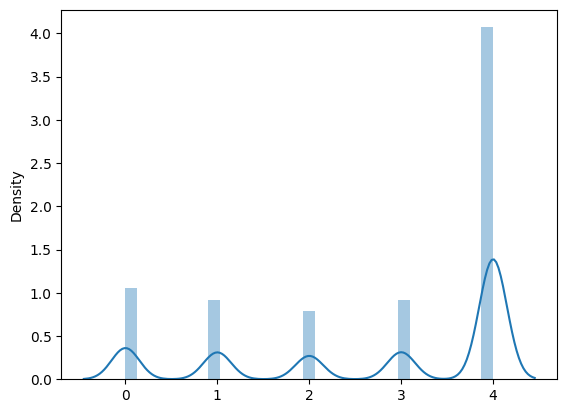

In [22]:
sns.distplot(banner_selected)

In [23]:
# Let's test this strategy with epsilon 0.2, so that it exploits 80% of the time.
for i in range(no_of_iterations):

    # select the banner using epsilon greedy policy
    banner = epsilon_greedy(0.2)

    # get the reward
    reward = df.values[i, banner]

    # update the selected banner count
    count[banner] += 1

    # sum the rewards obtained by that banner
    sum_rewards[banner]+=reward

    # calculate the Q value of the banner
    Q[banner] = sum_rewards[banner]/count[banner]

    banner_selected.append(banner)

<ipython-input-24-55031a37e219>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(banner_selected)


<Axes: ylabel='Density'>

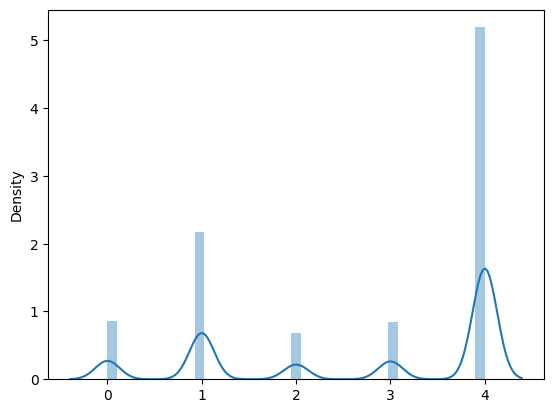

In [24]:
sns.distplot(banner_selected)

#### So how is MAB better than A/B testing

**A/B Testing Process:**

In traditional A/B testing, you'd show all banners equally while collecting data

At the END of the process, You'll know which banner performed best overall (like A/B testing)

Every time you show a poor-performing banner, you're losing potential clicks (and revenue)


1. Split Phase

* Divide your traffic equally among all variations (banners)
* Each banner gets exactly the same amount of exposure
* Continue this for a predetermined period


2. Analysis Phase

* After collecting sufficient data, analyze results
* Choose the best performing banner
* Only after analysis do you switch to using the winner


3. Limitations

* Lost opportunities during testing (showing poor performers equally)
* Can't adapt during the test
* All variants must complete the test period


**Multi-Armed Bandit Process:**

1. Simultaneous Exploration & Exploitation

* Starts showing all banners initially
* Gradually favors better-performing banners
* Continues testing other options with decreasing frequency


2. Adaptive Learning

* Updates performance metrics after each user interaction
* Adjusts banner selection probabilities in real-time
* Uses strategies like epsilon-greedy to balance exploration/exploitation


3. Advantages

* Reduces lost opportunities (shows better performers more often)
* Adapts to changing user preferences

For e.g.

If you have 5 banners and 10,000 visitors:

A/B Testing:
- Each banner gets exactly 2,000 views
- If Banner A has 30% Click Through Rate (CTR) and others 10%, you "waste" 8,000 views and risk of losing the customers.

MAB:
- Might give Banner-0 5,000 views once it discovers it performs better
- Other banners share remaining 5,000 views
- Results in more total clicks while still testing all options

The Next step to this is to add context.

Note, the banner preference varies from user to user. User A likes banner type 1, but user B might like banner type 3. So we have to personalize ad banners according to user behavior. To achieve this we can introduce a new bandit type called **contextual bandits.**
